In [4]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<function matplotlib.pyplot.show(close=None, block=None)>

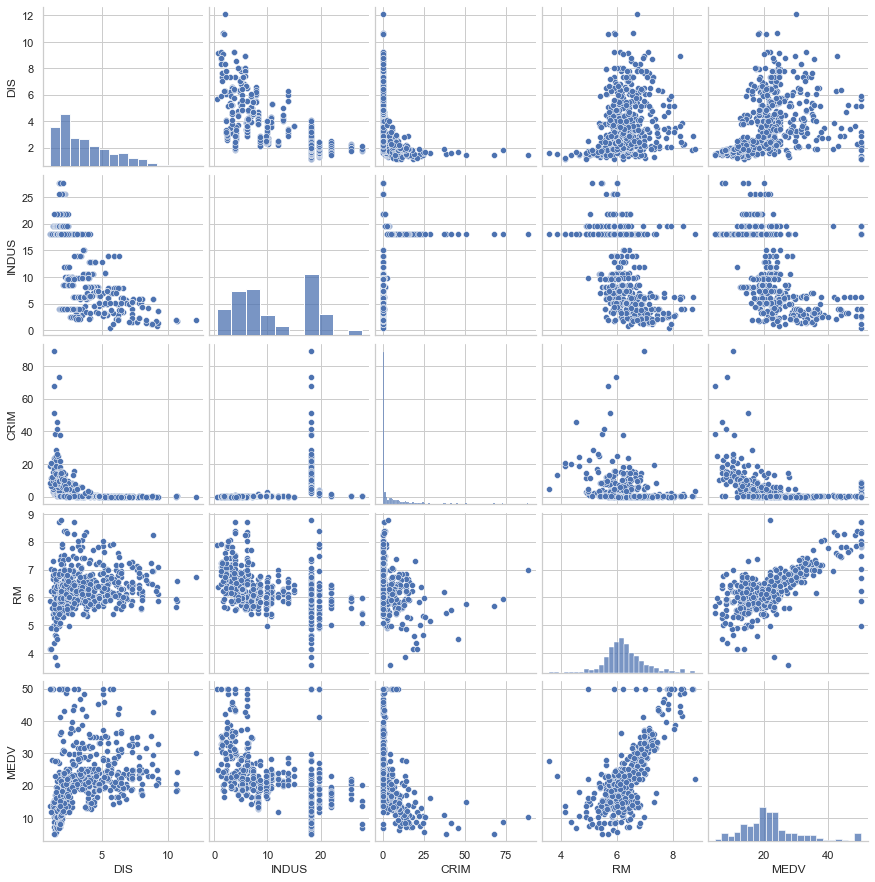

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
#DIS: es la distancia más cercana a los 5 distritos más importantes
#INDUS: Indice de las industrias en Boston
#CRIM: indice de driminalidad
#RM: Promedio de habitaciones en las casas
#MEDV: Mediana de los precios
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show

<AxesSubplot:>

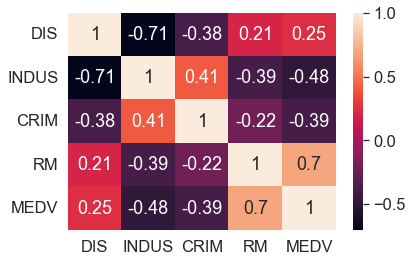

In [8]:
import numpy as np
#La funcion de correlaciones es de numpe y para que funcione, debemos darle los datos como un arreglo, por ese motivo usamos el values y a traspuesta 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

Text(0.5, 0, 'Promedio de habitaciones [RM]')

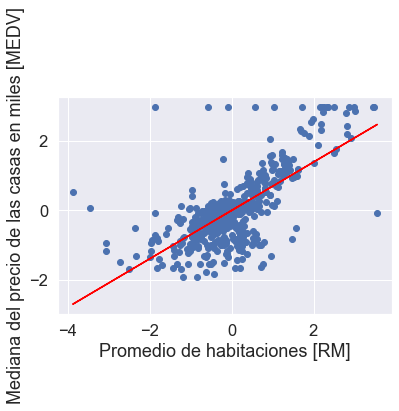

In [23]:
plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std), color='Red')
plt.ylabel('Mediana del precio de las casas en miles [MEDV]')
plt.xlabel('Promedio de habitaciones [RM]')

In [30]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de una casa con 5 habitaciones en Boston es de ", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

El precio de una casa con 5 habitaciones en Boston es de  [[10.83992413]]
